In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-prediction1/heart_data.csv
/kaggle/input/heart-disease-prediction1/index.html


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np


In [3]:
df = pd.read_csv('/kaggle/input/heart-disease-prediction1/heart_data.csv')
print(df.head())


   Unnamed: 0     biking    smoking  heart.disease
0           1  30.801246  10.896608      11.769423
1           2  65.129215   2.219563       2.854081
2           3   1.959665  17.588331      17.177803
3           4  44.800196   2.802559       6.816647
4           5  69.428454  15.974505       4.062224


In [4]:
df = df.drop("Unnamed: 0", axis=1)
#A few plots in Seaborn to understand the data

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


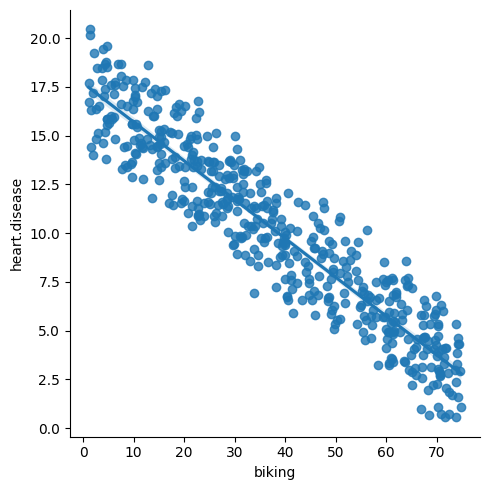

In [5]:
sns.lmplot(x='biking', y='heart.disease', data=df)  

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


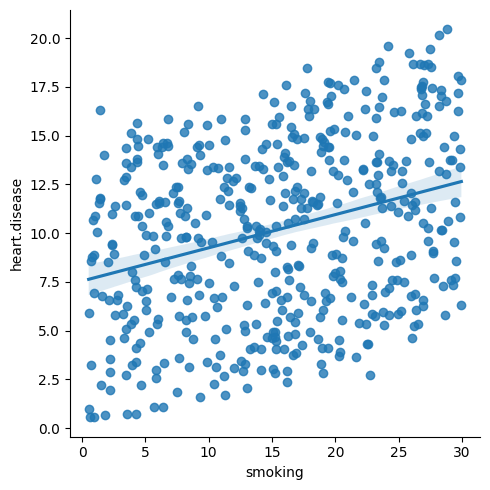

In [6]:
sns.lmplot(x='smoking', y='heart.disease', data=df)  

In [7]:
x_df = df.drop('heart.disease', axis=1)
y_df = df['heart.disease']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.3, random_state=42)

from sklearn import linear_model

#Create Linear Regression object
model = linear_model.LinearRegression()


In [9]:
model.fit(X_train, y_train) #Indep variables, dep. variable to be predicted
print(model.score(X_train, y_train))  #Prints the R^2 value, a measure of how well

0.9811067878031208


In [10]:
prediction_test = model.predict(X_test)    
print(y_test, prediction_test)
print("Mean sq. errror between y_test and predicted =", np.mean(prediction_test-y_test)**2)


487     6.756015
73      9.466026
231    14.088654
175    13.377430
237    16.384678
         ...    
193    14.547755
5       9.550046
116    14.411483
45     12.328899
16      5.443342
Name: heart.disease, Length: 150, dtype: float64 [ 5.61417231  9.23854928 15.77064591 13.96271678 16.97258754 13.38551065
  7.02565417  9.49069576  6.83117942 12.07219675  8.04307687 10.14595377
  5.91159788 10.14538696  7.3415733  17.65460707  4.15655062  6.87547269
  5.24683245  6.77480127  2.08250582  7.39533445 12.03453847 13.99326278
 12.09739539 13.60433903  6.19490735  9.56118094 13.94750676 11.82223539
  8.52602497 11.48105164 12.41957266 17.7284097   3.53706181  6.09047121
  8.17208463  7.50053942 12.56170624 10.47015413  4.88309485  4.00779535
  7.798394   10.9073288  10.77541879  8.85290916 17.03995211  7.50903037
 18.06939528  4.58997823  1.73224979  5.01082459  6.82467948 15.23572133
  9.30772808  6.34302188  8.37575419 10.34808915 13.74750805  3.50515222
  7.30319722  6.67918277 13.686728

In [11]:
import pickle
pickle.dump(model, open('model.pkl','wb'))

model = pickle.load(open('model.pkl','rb'))
print(model.predict([[20.1, 56.3]]))


[20.94129617]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [12]:
import numpy as np
from flask import Flask, request, render_template
import pickle

In [13]:
#Create an app object using the Flask class. 
app = Flask(__name__)

#Load the trained model. (Pickle file)
model = pickle.load(open('/kaggle/working/model.pkl', 'rb'))

In [14]:
@app.route('/kaggle/input/heart-disease-prediction1/')
def home():
    return index.html

In [15]:
@app.route('/predict',methods=['POST'])
def predict():

    int_features = [float(x) for x in request.form.values()] #Convert string inputs to float.
    features = [np.array(int_features)]  #Convert to the form [[a, b]] for input to the model
    prediction = model.predict(features)  # features Must be in the form [[a, b]]

    output = round(prediction[0], 2)
    absolute_path = os.path.join('/kaggle/input/heart-disease-prediction1/', 'index.html')

    return render_template(absolute_path, prediction_text='Percent with heart disease is {}'.format(output))

In [ ]:
if __name__ == "__main__":
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off
